In [6]:
import numpy as np
import matplotlib.pyplot as plt

#### Simulating the process of particles colliding ####

In [8]:
progression = []
init_A = 2
init_B = 2
init_C = 2
N_steps = 10

A_array = ['A' for n in range(init_A)]
B_array = ['B' for n in range(init_B)]
C_array = ['C' for n in range(init_C)]
box = A_array + B_array + C_array

for i in range(N_steps):
    pick1 = np.random.randint(0, len(box))
    pick2 = np.random.randint(0, len(box))
    if box[pick1] == box[pick2]:
        pass
    else:
        if box[pick1] == 'A' and box[pick2] == 'B':
            box[pick1], box[pick2] = 'C','C'
        if box[pick2] == 'A' and box[pick1] == 'B':
            box[pick1], box[pick2] = 'C','C'
        if box[pick1] == 'A' and box[pick2] == 'C':
            box[pick1], box[pick2] = 'B','B'
        if box[pick1] == 'C' and box[pick2] == 'A':
            box[pick1], box[pick2] = 'B','B'
        if box[pick1] == 'B' and box[pick2] == 'C':
            box[pick1], box[pick2] = 'A','A'
        if box[pick1] == 'C' and box[pick2] == 'B':
            box[pick1], box[pick2] = 'A','A'
    progression += [(box.count('A'), box.count('B'), box.count('C'))]
print(progression)
            

[(2, 2, 2), (2, 2, 2), (2, 2, 2), (1, 4, 1), (3, 3, 0), (3, 3, 0), (2, 2, 2), (2, 2, 2), (1, 1, 4), (0, 3, 3)]


#### Plotting the progression of the system ####

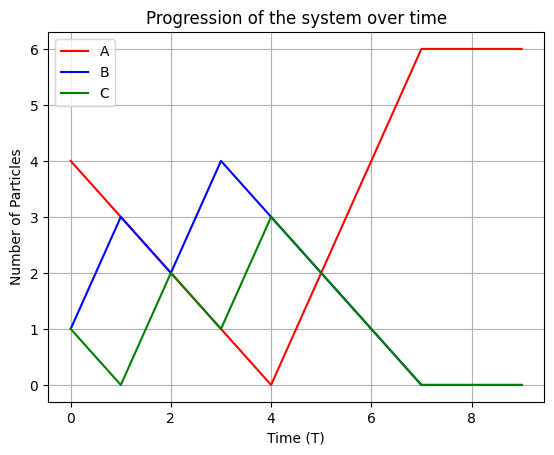

In [13]:
init_A = 4
init_B = 1
init_C = 1
progression = [(init_A, init_B, init_C)]
N_steps = 10

A_array = ['A' for n in range(init_A)]
B_array = ['B' for n in range(init_B)]
C_array = ['C' for n in range(init_C)]
box = A_array + B_array + C_array

for i in range(N_steps):
    viable = ['A', 'B', 'C']

    if box.count('A') == len(box) or box.count('B') == len(box) or box.count('C') == len(box):
        progression += [(box.count('A'), box.count('B'), box.count('C'))]

    else:
        pick1 = box[np.random.randint(0, len(box))] #pick random particle
        viable.remove(pick1) #remove that type from viable second choice
        choose_from = [viable[0] for n in range(box.count(viable[0]))] + [viable[1] for n in range(box.count(viable[1]))] #create new list with viable choices
        pick2 = choose_from[np.random.randint(0,len(choose_from))] #pick from new choices
        viable.remove(pick2) #remove pick2 from viable options
        
        box.remove(pick1) #remove pick1 from box
        box.remove(pick2) #remove pick2 from box
        box += [viable[0], viable[0]] #add the third type of parrticle into the box
        
        progression += [(box.count('A'), box.count('B'), box.count('C'))] #keep track of particles
#print(progression)

progA = [progression[n][0] for n in range(N_steps)]
progB = [progression[n][1] for n in range(N_steps)]
progC = [progression[n][2] for n in range(N_steps)]
#print(progA)

x = [n for n in range(N_steps)]
plt.plot(x, progA, '-r', label = 'A')
plt.plot(x, progB,'-b', label = 'B')
plt.plot(x, progC,'-g', label = 'C')
plt.grid()
#plt.semilogx()
plt.title('Progression of the system over time')
plt.xlabel('Time (T)')
plt.ylabel('Number of Particles')
plt.legend()
plt.show()

#### Creating a funciton to check for stability ####

In [2]:
def stable(a,b,c):
    n = a + b + c
    N11, N12, N13 = n - a, -b, -c
    N21, N22, N23 = -a, n-b, c
    N31, N32, N33 = -a, -b, n-c
    if ((1/3) * (N11 - N12)) % 1 < 1/1000 and ((2/3) * (N12 + N11/2)) % 1 < 1/1000:
        return f"{(a,b,c)} is a stable configuration"
    elif  ((1/3) * (N21 - N22)) % 1 < 1/1000 and ((2/3) * (N22 + N21/2)) % 1 < 1/1000:
        return f"{(a,b,c)} is a stable configuration"
    elif  ((1/3) * (N31 - N32)) % 1 < 1/1000 and ((2/3) * (N32 + N31/2)) % 1 < 1/1000:
        return f"{(a,b,c)} is a stable configuration"
    else:
        return f"{(a,b,c)} is an unstable configuration"

Checking some known cases

In [3]:
print(stable(0,4,2))
print(stable(7,1,1))
print(stable(1,1,2))

(0, 4, 2) is an unstable configuration
(7, 1, 1) is a stable configuration
(1, 1, 2) is a stable configuration


Testing my conjecture with some examples

In [36]:
for i in range(21):
    print(stable(i,i+1,i+2))

(0, 1, 2) is an unstable configuration
(1, 2, 3) is an unstable configuration
(2, 3, 4) is an unstable configuration
(3, 4, 5) is an unstable configuration
(4, 5, 6) is an unstable configuration
(5, 6, 7) is an unstable configuration
(6, 7, 8) is an unstable configuration
(7, 8, 9) is an unstable configuration
(8, 9, 10) is an unstable configuration
(9, 10, 11) is an unstable configuration
(10, 11, 12) is an unstable configuration
(11, 12, 13) is an unstable configuration
(12, 13, 14) is an unstable configuration
(13, 14, 15) is an unstable configuration
(14, 15, 16) is an unstable configuration
(15, 16, 17) is an unstable configuration
(16, 17, 18) is an unstable configuration
(17, 18, 19) is an unstable configuration
(18, 19, 20) is an unstable configuration
(19, 20, 21) is an unstable configuration
(20, 21, 22) is an unstable configuration


#### Determining which particle the system will stablilise as ####

Finding which species a given configuration can stabilise as, and how long it takes:

In [65]:
count = 0
A,B,C = 1,1,1
current = np.array([A,B,C])
n = A+B+C

winner = []

while current[0] < n and current[1] < n and current[2] < n:
        count += 1
        if current[0] == 0 or current[1] == 0 or current[2] == 0:
            if current[0] == 0:
                current += np.array([2,-1,-1])
            elif current[1] == 0:
                current += np.array([-1,2,-1])
            elif current[2] == 0:
                current += np.array([-1,-1,2])
        else:
            rand = np.random.randint(1,4)
            if rand == 1 :
                current += np.array([2,-1,-1])
            elif rand == 2 :
                current += np.array([-1,2,-1])
            elif rand == 3 :
                current += np.array([-1,-1,2])
        print(current)
print(count)

if current[0] > 0:
    winner += ['A']
elif current[1] > 0:
    winner += ['B']
elif current[2] > 0:
    winner += ['C']

print(winner)

[0 0 3]
1
['C']


Now repating this many times and plotting a histogram:

(array([0.3008, 0.3024, 0.3968]),
 array([0., 1., 2., 3.]),
 <BarContainer object of 3 artists>)

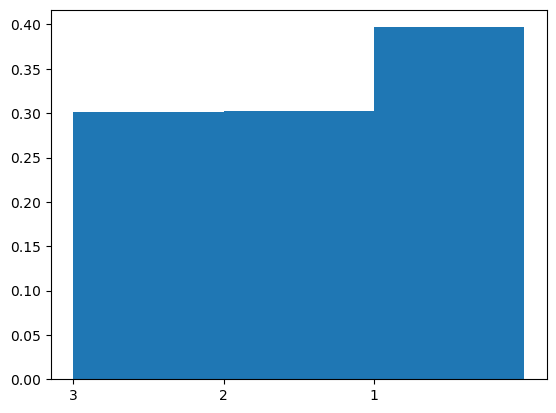

In [15]:
A = 7
B = 1
C = 1
runs = 10000

n = A+B+C
current = np.array([A,B,C])

lengths = []
winners = []

for i in range(runs):
    count = 0
    current = np.array([A,B,C])
    
    while current[0] < n and current[1] < n and current[2] < n:
        prob1 = (current[1] * current[2]) / (current[0] * current[1] + current[0] * current[2] + current[1] * current[2])
        prob2 = (current[0] * current[2]) / (current[0] * current[1] + current[0] * current[2] + current[1] * current[2])
        prob3 = (current[0] * current[1]) / (current[0] * current[1] + current[0] * current[2] + current[1] * current[2])
        
        count += 1
        if current[0] == 0 or current[1] == 0 or current[2] == 0:
            if current[0] == 0:
                current += np.array([2,-1,-1])
            elif current[1] == 0:
                current += np.array([-1,2,-1])
            elif current[2] == 0:
                current += np.array([-1,-1,2])
        else:
            rand = np.random.uniform(0,1)
            if rand < prob1:
                current += np.array([2,-1,-1])
            elif prob1 <= rand < prob1 + prob2  :
                current += np.array([-1,2,-1])
            elif prob1 + prob2 <= rand:
                current += np.array([-1,-1,2])
        #print(current)
    lengths += [count]
    
    if current[0] > 0:
        winners += ['1']#means A
    elif current[1] > 0:
        winners += ['2']#means B
    elif current[2] > 0:
        winners += ['3']#means C
#print(lengths)

#plt.hist(np.array(lengths), density = True, bins = [n for n in range(max(lengths))])
plt.hist(winners, density = True, bins = [0,1,2,3])

## What is stabilisation probability vector? ##

In [24]:
def stab_prob(a,b,c):
    n = a+b+c
    N11, N12, N13 = n - a, -b, -c
    N21, N22, N23 = -a, n-b, c
    N31, N32, N33 = -a, -b, n-c
    
    if n % 3 !=0:
        if ((1/3) * (N11 - N12)) % 1 < 1/1000 and ((2/3) * (N12 + N11/2)) % 1 < 1/1000:
            return f"{(a,b,c)} has stabilisation probabilities <1,0,0>"
        elif  ((1/3) * (N21 - N22)) % 1 < 1/1000 and ((2/3) * (N22 + N21/2)) % 1 < 1/1000:
            return f"{(a,b,c)} has stabilisation probabilities <0,1,0>"
        elif  ((1/3) * (N31 - N32)) % 1 < 1/1000 and ((2/3) * (N32 + N31/2)) % 1 < 1/1000:
            return f"{(a,b,c)} has stabilisation probabilities <0,0,1>"
    else:
        return "undetermined"
        

Check the code with a known result:

In [28]:
stab_prob(2,2,1)

'(2, 2, 1) has stabilisation probabilities <0,0,1>'